# Import Libraries

In [1]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Dataset

In [2]:
pd.options.display.max_columns = 50

df = pd.read_excel('8WS2_ver2.xlsx')
df.head()

,従業員番号,離職,年齢,部署,役職,職位,性別,配偶者状況,業績評価,勤続年数,学歴,修学分野,業務経験年数,前年度研修参加回数,現職位経験年数,前回昇進からの経過年数,現管理者との業務年数,転職回数,出張頻度,通勤距離(km),ワークライフバランス,環境満足度,業務関与度,業務満足度,関係性満足度,標準業務時間,月収,給与上昇率,ストックオプションレベル,月勤務時間,残業時間,有給長期休暇利用開始日,有給長期休暇利用終了日
0,1,Yes,41,Sales,Sales Executive,2,Female,Single,3,6,2,Life Sciences,8,0,4,0,5,8,Travel_Rarely,1,1,2,3,4,1,8,5993,11,0,147,OverTimePay: 38,2015年10月16日,2015年10月17日
1,2,No,49,Research & Development,Research Scientist,2,Male,Married,4,10,1,Life Sciences,10,3,7,1,7,1,Travel_Frequently,8,3,3,2,2,4,8,5130,23,1,176,OverTimePay: 2,2015年6月28日,2015年7月2日
2,4,Yes,37,Research & Development,Laboratory Technician,1,Male,Single,3,0,2,Other,7,3,0,0,0,6,Travel_Rarely,2,3,4,2,3,2,8,2090,15,0,259,OverTimePay: 4,2015年5月24日,2015年5月24日
3,5,No,33,Research & Development,Research Scientist,1,Female,Married,3,8,4,Life Sciences,8,3,7,3,0,1,Travel_Frequently,3,3,4,3,3,3,8,2909,11,0,229,OverTimePay: 22,2015年12月12日,2015年12月13日
4,7,No,27,Research & Development,Laboratory Technician,1,Male,Married,3,2,1,Medical,6,3,2,2,2,9,Travel_Rarely,2,3,1,3,2,4,8,3468,12,1,168,OverTimePay: 0,2015年8月21日,2015年8月24日


In [3]:
column_mapping = {
    '従業員番号': 'Employee ID',
    '離職': 'Resignation',
    '年齢': 'Age',
    '部署': 'Department',
    '役職': 'Position',
    '職位': 'Position Rank',
    '性別': 'Gender',
    '配偶者状況': 'Marital Status',
    '業績評価': 'Performance Rating',
    '勤続年数': 'Years of Service',
    '学歴': 'Education',
    '修学分野': 'Field of Study',
    '業務経験年数': 'Years of Experience',
    '前年度研修参加回数': 'Training Participation Last Year',
    '現職位経験年数': 'Years in Current Position',
    '前回昇進からの経過年数': 'Years Since Last Promotion',
    '現管理者との業務年数': 'Years with Current Manager',
    '転職回数': 'Number of Job Changes',
    '出張頻度': 'Business Travel Frequency',
    '通勤距離(km)': 'Commute Distance (km)',
    'ワークライフバランス': 'Work-Life Balance',
    '環境満足度': 'Job Environment Satisfaction',
    '業務関与度': 'Job Involvement',
    '業務満足度': 'Job Satisfaction',
    '関係性満足度': 'Relationship Satisfaction',
    '標準業務時間': 'Standard Hours',
    '月収': 'Monthly Income',
    '給与上昇率': 'Salary Hike Rate',
    'ストックオプションレベル': 'Stock Option Level',
    '月勤務時間': 'Monthly Working Hours',
    '残業時間': 'Overtime Hours',
    '有給長期休暇利用開始日': 'Paid Long Vacation Start Date',
    '有給長期休暇利用終了日': 'Paid Long Vacation End Date'
}

df = df.rename(columns=column_mapping)
df.columns

Index(['Employee ID', 'Resignation', 'Age', 'Department', 'Position',
       'Position Rank', 'Gender', 'Marital Status', 'Performance Rating',
       'Years of Service', 'Education', 'Field of Study',
       'Years of Experience', 'Training Participation Last Year',
       'Years in Current Position', 'Years Since Last Promotion',
       'Years with Current Manager', 'Number of Job Changes',
       'Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction', 'Standard Hours',
       'Monthly Income', 'Salary Hike Rate', 'Stock Option Level',
       'Monthly Working Hours', 'Overtime Hours',
       'Paid Long Vacation Start Date', 'Paid Long Vacation End Date'],
      dtype='object')

In [4]:
df.shape

(1470, 33)

In [5]:
df.dtypes.value_counts()

int64     23
object    10
dtype: int64

In [6]:
df.select_dtypes(include='object').columns

Index(['Resignation', 'Department', 'Position', 'Gender', 'Marital Status',
       'Field of Study', 'Business Travel Frequency', 'Overtime Hours',
       'Paid Long Vacation Start Date', 'Paid Long Vacation End Date'],
      dtype='object')

# Data Prep

In [7]:
print(f'There are {df.isnull().sum().sum()} null values')
print(f'There are {df.duplicated().sum()} duplicated rows')

if df.isnull().sum().sum() + df.duplicated().sum() == 0:
    print('YAY!')

There are 0 null values
There are 0 duplicated rows
YAY!


# Feature Engineering

In [8]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [9]:
df['Resignation'] = df['Resignation'].apply(lambda x: 0 if x == 'No' else 1)
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [10]:
df['Business Travel Frequency'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: Business Travel Frequency, dtype: int64

In [11]:
df['Business Travel Frequency'] = df['Business Travel Frequency'].apply(lambda x: 0 if x =='Non-Travel' else (1 if x == 'Travel_Rarely' else 2))

In [12]:
import re

df['Overtime Hours'] = df['Overtime Hours'].apply(lambda x: re.sub(r'\D', '', str(x)))
df['Overtime Hours'] = df['Overtime Hours'].astype('int')

In [13]:
df['Marital Status'] = df['Marital Status'].apply(lambda x: 0 if x =='Single' else (1 if x == 'Divorced' else 2))

In [14]:
import datetime

df['Paid Long Vacation Start Date'] = pd.to_datetime(df['Paid Long Vacation Start Date'], format='%Y年%m月%d日')
df['Paid Long Vacation End Date'] = pd.to_datetime(df['Paid Long Vacation End Date'], format='%Y年%m月%d日')
df['Long Vacation'] = (df['Paid Long Vacation End Date'] - df['Paid Long Vacation Start Date']).dt.days

# EDA

In [15]:
df.dtypes

Employee ID                                  int64
Resignation                                  int64
Age                                          int64
Department                                  object
Position                                    object
Position Rank                                int64
Gender                                       int64
Marital Status                               int64
Performance Rating                           int64
Years of Service                             int64
Education                                    int64
Field of Study                              object
Years of Experience                          int64
Training Participation Last Year             int64
Years in Current Position                    int64
Years Since Last Promotion                   int64
Years with Current Manager                   int64
Number of Job Changes                        int64
Business Travel Frequency                    int64
Commute Distance (km)          

In [16]:
df.head()

,Employee ID,Resignation,Age,Department,Position,Position Rank,Gender,Marital Status,Performance Rating,Years of Service,Education,Field of Study,Years of Experience,Training Participation Last Year,Years in Current Position,Years Since Last Promotion,Years with Current Manager,Number of Job Changes,Business Travel Frequency,Commute Distance (km),Work-Life Balance,Job Environment Satisfaction,Job Involvement,Job Satisfaction,Relationship Satisfaction,Standard Hours,Monthly Income,Salary Hike Rate,Stock Option Level,Monthly Working Hours,Overtime Hours,Paid Long Vacation Start Date,Paid Long Vacation End Date,Long Vacation
0,1,1,41,Sales,Sales Executive,2,0,0,3,6,2,Life Sciences,8,0,4,0,5,8,1,1,1,2,3,4,1,8,5993,11,0,147,38,2015-10-16,2015-10-17,1
1,2,0,49,Research & Development,Research Scientist,2,1,2,4,10,1,Life Sciences,10,3,7,1,7,1,2,8,3,3,2,2,4,8,5130,23,1,176,2,2015-06-28,2015-07-02,4
2,4,1,37,Research & Development,Laboratory Technician,1,1,0,3,0,2,Other,7,3,0,0,0,6,1,2,3,4,2,3,2,8,2090,15,0,259,4,2015-05-24,2015-05-24,0
3,5,0,33,Research & Development,Research Scientist,1,0,2,3,8,4,Life Sciences,8,3,7,3,0,1,2,3,3,4,3,3,3,8,2909,11,0,229,22,2015-12-12,2015-12-13,1
4,7,0,27,Research & Development,Laboratory Technician,1,1,2,3,2,1,Medical,6,3,2,2,2,9,1,2,3,1,3,2,4,8,3468,12,1,168,0,2015-08-21,2015-08-24,3


# Visualizations

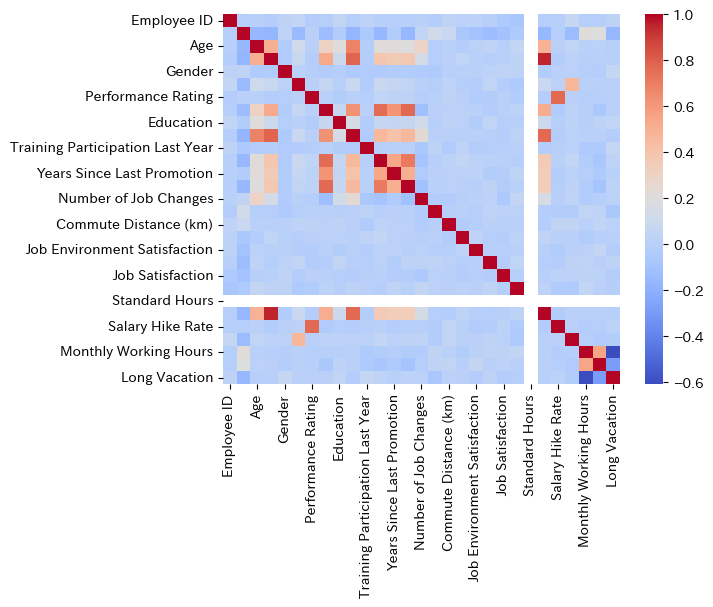

In [17]:
sns.heatmap(df.corr(), cmap='coolwarm');

## Outliers

In [18]:
# Create Functions to deal with outliers

def get_outliers(column_name):
    # Calculate the IQR for the column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identify the outliers in the column
    outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

    # Print the number of outliers
    print(f"Number of outliers in the {column_name} column: {len(outliers)} -- {round(len(outliers)/len(df)*100, 2)}%")
    
def remove_outliers(column_name):
    df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

In [19]:
num_columns = ['Years of Service','Years of Experience', 'Training Participation Last Year',
               'Years in Current Position', 'Years Since Last Promotion','Years with Current Manager', 
               'Number of Job Changes', 'Monthly Income', 'Stock Option Level',
               'Monthly Working Hours', 'Overtime Hours']

In [20]:
for x in num_columns:
    get_outliers(x)

Number of outliers in the Years of Service column: 104 -- 7.07%
Number of outliers in the Years of Experience column: 63 -- 4.29%
Number of outliers in the Training Participation Last Year column: 238 -- 16.19%
Number of outliers in the Years in Current Position column: 21 -- 1.43%
Number of outliers in the Years Since Last Promotion column: 107 -- 7.28%
Number of outliers in the Years with Current Manager column: 14 -- 0.95%
Number of outliers in the Number of Job Changes column: 52 -- 3.54%
Number of outliers in the Monthly Income column: 114 -- 7.76%
Number of outliers in the Stock Option Level column: 85 -- 5.78%
Number of outliers in the Monthly Working Hours column: 123 -- 8.37%
Number of outliers in the Overtime Hours column: 118 -- 8.03%


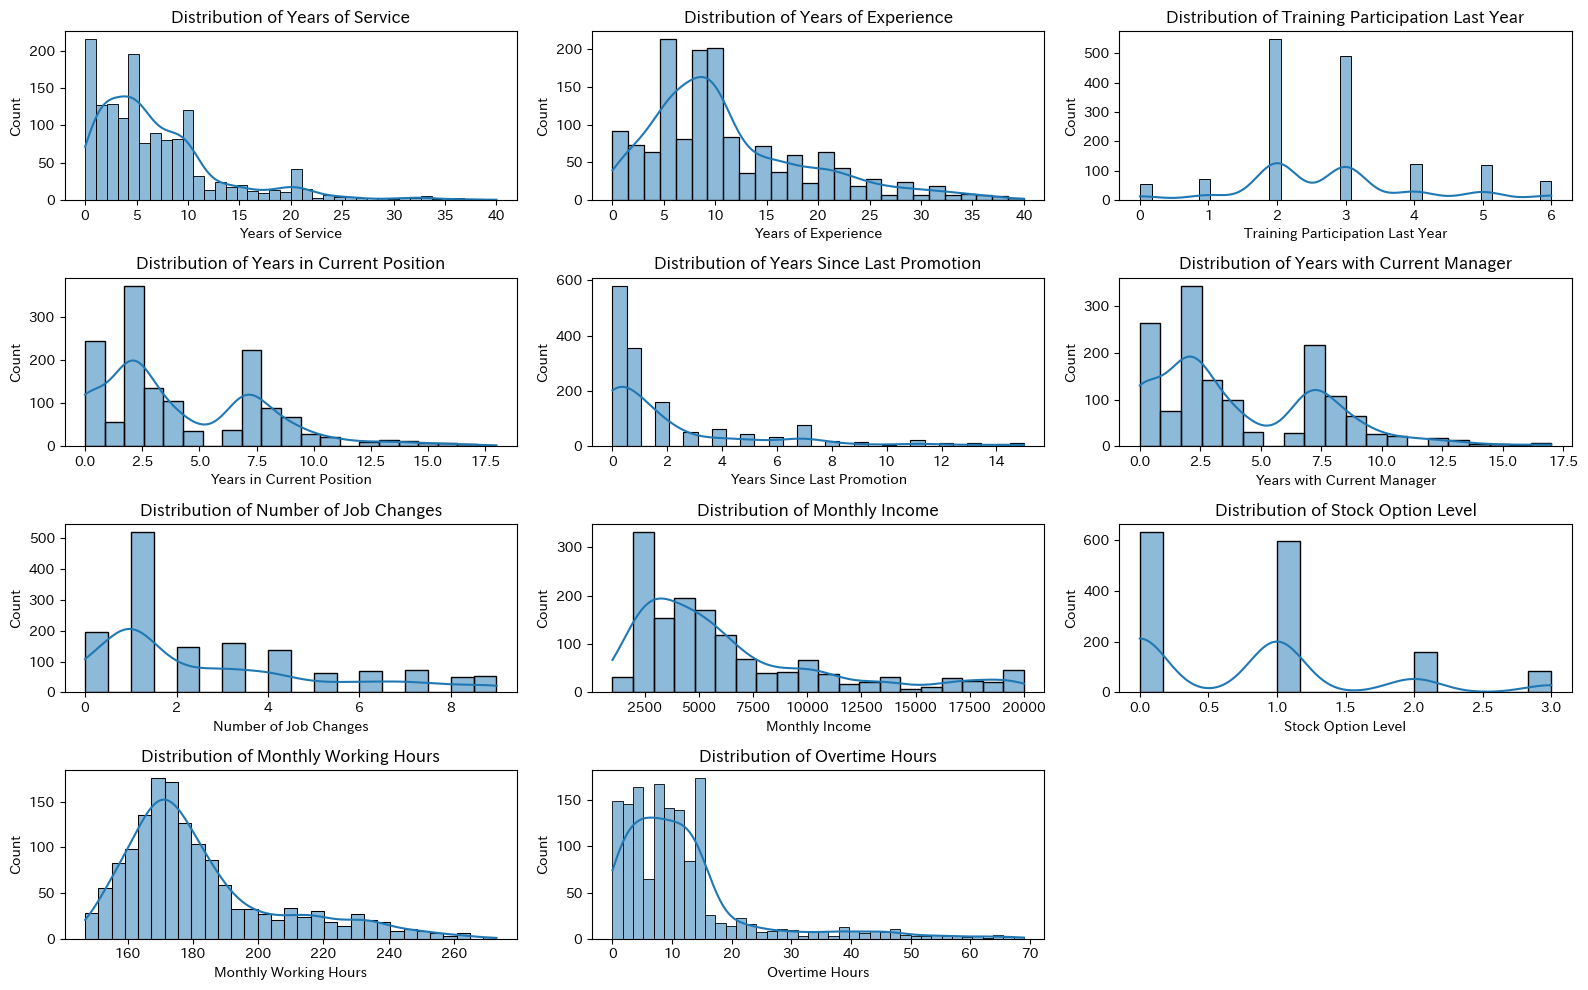

In [21]:
fig, ax = plt.subplots(4, 3, figsize=(16, 10))

num_plots = len(num_columns)
num_rows = (num_plots - 1) // 3 + 1

for i, x in enumerate(num_columns):
    if i < num_plots:
        row_index = i // 3  # Row index of the subplot
        col_index = i % 3   # Column index of the subplot
        ax[row_index, col_index].set_title(f"Distribution of {x}")
        sns.histplot(data=df, x=x, kde=True, ax=ax[row_index, col_index])

# Remove any empty subplots
if num_plots < num_rows * 3:
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show();

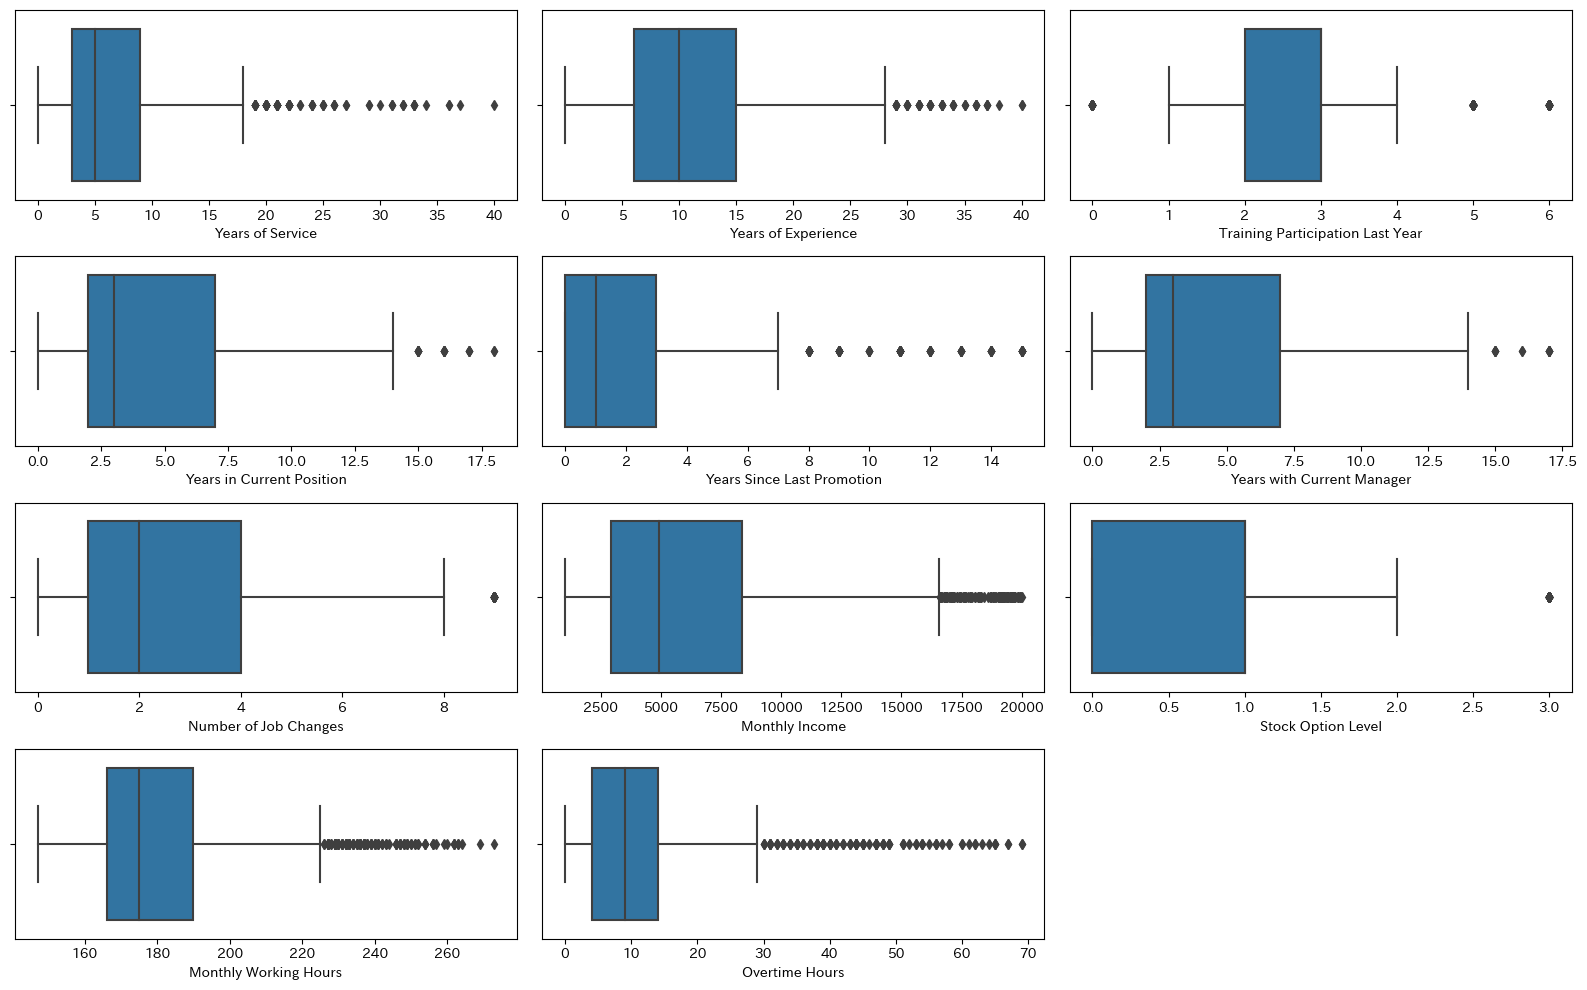

In [22]:
fig, ax = plt.subplots(4, 3, figsize=(16, 10))

num_plots = len(num_columns)
num_rows = (num_plots - 1) // 3 + 1

for i, x in enumerate(num_columns):
    if i < num_plots:
        row_index = i // 3  # Row index of the subplot
        col_index = i % 3   # Column index of the subplot
        sns.boxplot(data=df, x=x, ax=ax[row_index, col_index])

# Remove any empty subplots
if num_plots < num_rows * 3:
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show();

# Model Steps

## Define Target and Features

In [23]:
y = df['Resignation']

In [24]:
X = df.drop(columns= ['Employee ID', 'Resignation', 'Department', 'Position', 'Field of Study', 
                      'Paid Long Vacation Start Date', 'Paid Long Vacation End Date'])

## Train Test Split

In [25]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 27), (441, 27), (1029,), (441,))

## Scale Numerical Features

In [26]:
# group features with outliers for robust scaling
X_treme_train = X_train[['Years of Service','Years of Experience', 'Training Participation Last Year',
               'Years in Current Position', 'Years Since Last Promotion','Years with Current Manager', 
               'Number of Job Changes', 'Monthly Income', 'Stock Option Level',
               'Monthly Working Hours', 'Overtime Hours']]

X_treme_test = X_test[['Years of Service','Years of Experience', 'Training Participation Last Year',
               'Years in Current Position', 'Years Since Last Promotion','Years with Current Manager', 
               'Number of Job Changes', 'Monthly Income', 'Stock Option Level',
               'Monthly Working Hours', 'Overtime Hours']]

rob = RobustScaler()

X_treme_train_scaled = pd.DataFrame(rob.fit_transform(X_treme_train),
                        columns = rob.get_feature_names_out())

X_treme_test_scaled = pd.DataFrame(rob.transform(X_treme_test),
                        columns = rob.get_feature_names_out())

In [27]:
X_num_train = X_train[['Age', 'Position Rank', 'Gender', 'Marital Status',
       'Performance Rating', 'Education','Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction', 'Standard Hours',
       'Salary Hike Rate', 'Long Vacation']]

X_num_test = X_test[['Age', 'Position Rank', 'Gender', 'Marital Status',
       'Performance Rating', 'Education','Business Travel Frequency', 'Commute Distance (km)',
       'Work-Life Balance', 'Job Environment Satisfaction', 'Job Involvement',
       'Job Satisfaction', 'Relationship Satisfaction', 'Standard Hours',
       'Salary Hike Rate', 'Long Vacation']]

mmax = MinMaxScaler()

X_num_train_scaled = pd.DataFrame(mmax.fit_transform(X_num_train),
                                 columns = mmax.get_feature_names_out())

X_num_test_scaled = pd.DataFrame(mmax.fit_transform(X_num_test),
                                 columns = mmax.get_feature_names_out())

## Concatenation

In [28]:
X_train_scaled = pd.concat([X_num_train_scaled, X_treme_train_scaled], axis=1)

In [29]:
X_test_scaled = pd.concat([X_num_test_scaled, X_treme_test_scaled], axis=1)
X_test_scaled.head()

,Age,Position Rank,Gender,Marital Status,Performance Rating,Education,Business Travel Frequency,Commute Distance (km),Work-Life Balance,Job Environment Satisfaction,Job Involvement,Job Satisfaction,Relationship Satisfaction,Standard Hours,Salary Hike Rate,Long Vacation,Years of Service,Years of Experience,Training Participation Last Year,Years in Current Position,Years Since Last Promotion,Years with Current Manager,Number of Job Changes,Monthly Income,Stock Option Level,Monthly Working Hours,Overtime Hours
0,0.833333,0.50,0.0,1.0,0.0,0.25,0.5,0.214286,0.666667,0.000000,0.333333,1.000000,1.000000,0.0,0.500000,0.1,0.000000,2.777778,0.0,-0.2,-0.333333,0.2,1.666667,1.080897,0.0,1.217391,0.5
1,0.309524,0.00,1.0,1.0,0.0,0.50,1.0,0.035714,0.000000,0.333333,0.666667,1.000000,0.666667,0.0,0.142857,0.1,-0.428571,-0.333333,-1.0,-0.2,0.333333,-0.2,1.333333,-0.245082,0.0,2.826087,1.3
2,0.261905,0.25,1.0,0.5,0.0,0.25,0.5,0.678571,0.666667,1.000000,0.666667,1.000000,1.000000,0.0,0.214286,0.4,-0.285714,0.000000,-1.0,-0.2,-0.333333,-0.2,0.000000,0.344916,0.0,-0.695652,-0.7
3,0.595238,0.50,0.0,0.0,0.0,0.75,0.5,0.107143,1.000000,1.000000,0.333333,1.000000,1.000000,0.0,0.214286,0.7,2.285714,1.444444,0.0,0.8,4.666667,2.8,0.333333,0.951646,-1.0,-0.260870,0.2
4,0.190476,0.00,1.0,0.0,0.0,0.50,0.5,0.857143,0.333333,0.000000,0.000000,0.666667,0.666667,0.0,0.071429,0.2,-0.571429,-1.000000,-1.0,-0.6,-0.333333,-0.4,-0.333333,-0.507814,-1.0,-0.130435,0.1


## Baseline Model - Most Frequent Class

In [30]:
y_train.value_counts()

0    872
1    157
Name: Resignation, dtype: int64

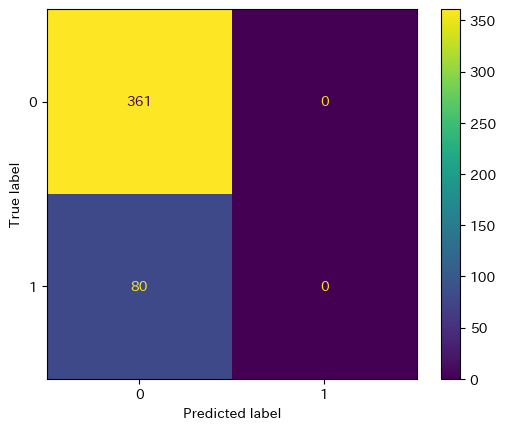

In [31]:
y_pred_baseline = pd.Series([0]*len(y_test))

cm = confusion_matrix(y_test, y_pred_baseline, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [32]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       361
           1       0.00      0.00      0.00        80

    accuracy                           0.82       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.67      0.82      0.74       441



/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

## Logistic Regression

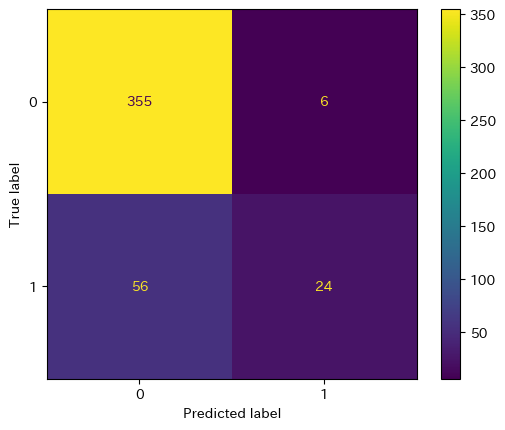

In [33]:
logreg = LogisticRegression(max_iter = 1_000,  # LBFGS Convergence
                            penalty = "l2")    # Default penalty

logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_logreg, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [34]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       361
           1       0.80      0.30      0.44        80

    accuracy                           0.86       441
   macro avg       0.83      0.64      0.68       441
weighted avg       0.85      0.86      0.83       441



## Feature Permutation

In [35]:
from sklearn.inspection import permutation_importance

# Fit model
model = LogisticRegression().fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model, X_test_scaled, y_test, 
                                           scoring='accuracy',
                                          random_state=22) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_test.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
20,Standard Hours,0.018594
24,Monthly Working Hours,0.014512
6,Education,0.014512
25,Overtime Hours,0.012698
11,Years with Current Manager,0.012698
3,Marital Status,0.010884
9,Years in Current Position,0.010884
10,Years Since Last Promotion,0.009524
19,Relationship Satisfaction,0.00907
16,Job Environment Satisfaction,0.008163


## Comments

- Just as with the previous "basic" model, the features fail to explain the variance between different employees and whether they will quit

- Now I will try to look at a select group of employees to search for similarities among them

# Subset - Long-time Employees

- let's see if there is any pattern among employees who have been working for their company for more than 5 years and haven't quit

In [52]:
young = df[df['Age'] < 40]

In [53]:
loyal = young[young['Resignation']== 0]

In [54]:
quitters = young[young['Resignation'] == 1]

/tmp/ipykernel_1131/4014610135.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sns.boxplot(data=pd.concat([loyal.median(), quitters.median()], axis=1))
/tmp/ipykernel_1131/4014610135.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.boxplot(data=pd.concat([loyal.median(), quitters.median()], axis=1))
/tmp/ipykernel_1131/4014610135.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sns.boxplot(data=pd.concat([loyal.median(), quitters.median()], axis=1))
/tmp/ipykernel_1131/4014610135.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future ver

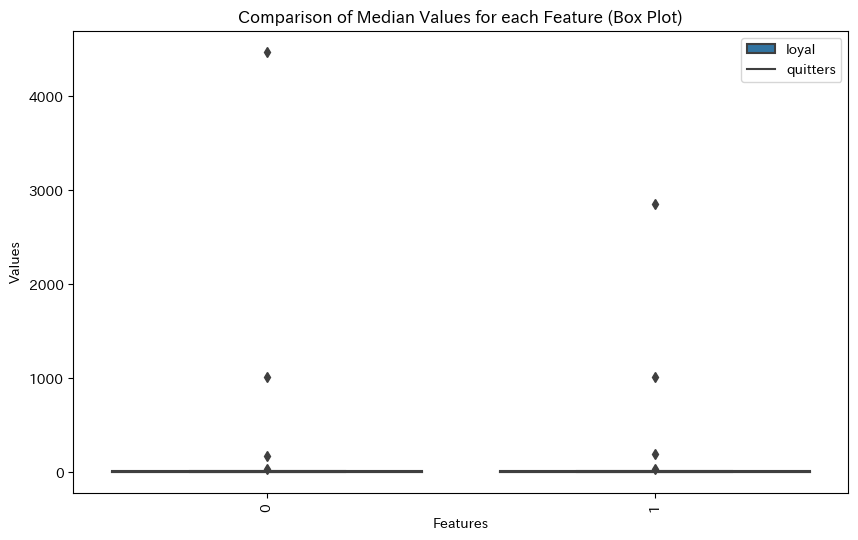

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.concat([loyal.median(), quitters.median()], axis=1))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Comparison of Median Values for each Feature (Box Plot)')
plt.legend(['loyal', 'quitters'])
plt.show();